# Digital Images as Data

---
## Learning Objectives
By the end of this module, learners will be able to:
- Understand what digital images are and how they are stored.
- Distinguish between grayscale and RGB images.
- Interpret image shape, data type, and number of channels.
- Visualize pixel intensity distributions using histograms.
- Apply Python to explore and manipulate image data.

---
## What is a Digital Image? Pixels and Arrays
A digital image is a numerical representation of a visual object.
- The image is divided into pixels (short for picture elements), arranged in a grid (like a spreadsheet).
- Each pixel contains a value representing intensity (brightness), or a set of values for color images.
- In programming, this grid is stored as a 2D or 3D array, where each cell holds the pixel value.

*Think of an image as a table: rows × columns of numbers.*

![](data/pixels.png)

---
## Reading an Image

There are many different libraries image data reading and writing. Most general purpose ones are Open-CV, Scikit-image, and Pillow. Other data-type specific libraries are tifffile, nd2 etc. For microscopy images, bioio is also a very powerful library for reading microscopy data and metadata.

Different libraries have slightly different ways of reading the images but at the end they produce an n-dimensional array with pixel values. Below, we will show how images are read using scikit-image.

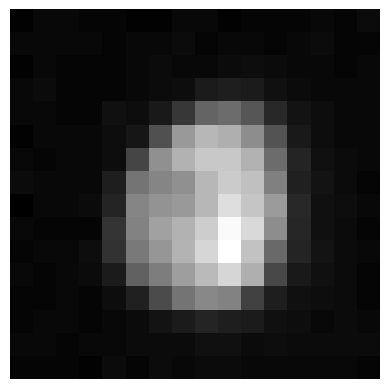

[[  2   8   8   5   5   2   2   8   8   2   5   5   5   8   5  11]
 [  8   8   8   8   5   8   8  11   5   8   8   5   8  11   5   5]
 [  2   8   5   5   5   8  11   8   8  11  13  11   8   8   5   8]
 [  8  11   5   5   5   8  11  13  27  30  27  16  11   8   8   8]
 [  8   8   5   5  16  13  25  55 100 108  86  41  19  13   8   8]
 [  2   8   8   8  13  22  80 153 183 175 141  83  25  13   8   8]
 [  8   5   8   8  13  69 144 178 200 200 178 108  36  16  11   8]
 [ 11   8   8   8  30 116 133 144 183 203 192 128  33  19  11   5]
 [  0   8   8  11  36 133 147 153 183 222 197 155  41  16  13   8]
 [  8   5   5   5  52 130 161 178 205 250 217 141  38  16  11   5]
 [  5   8   8  13  50 122 150 180 214 255 194 105  36  19  11   8]
 [  8   5   8  11  27  97 125 158 186 214 175  72  25  16  11   5]
 [  5   5   8   5  13  33  75 116 136 130  66  30  16  13  11   5]
 [  5   8   8   5   8  11  19  27  36  30  27  16  13   8  11   8]
 [  8   8   5   8   8  11  11  11  16  16  11  13  11  11  11 

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt

image = imread('data/nucleus_16x16.png')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

print(image)

---
### Exercise
1. Read the `nuclei_64x64.png` image
2. Check image shape and ensure
3. Display the image
4. Create a patch of 16x16
5. Display the patch and print

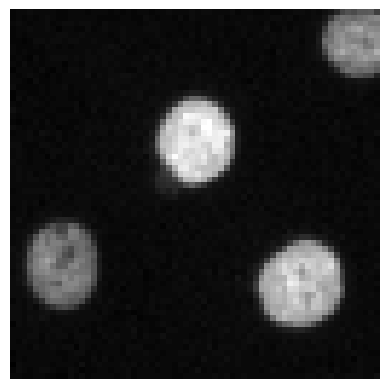

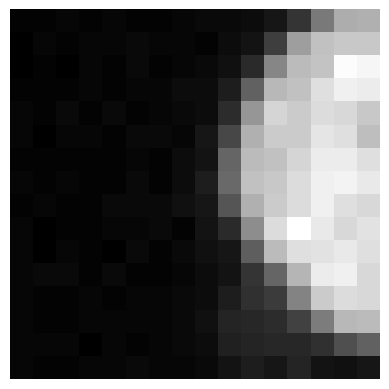

[[  9   9  12   9  12   9   9  12  15  15  18  28  56 123 173 176]
 [  6  12   9  12  12  15  12  12   9  18  25  66 158 192 199 199]
 [  6   9   6  12   9  15   9  12  15  22  47 135 186 195 249 243]
 [  9   9   9  12   9  12  12  18  18  34 101 183 192 221 237 233]
 [ 12   9  15   9  15   9  12  15  18  50 151 211 202 218 214 199]
 [ 12   6  12  12   9  15  15  12  28  75 176 202 202 227 221 189]
 [  9   9   9   9   9  12   9  18  25 104 186 192 211 233 233 221]
 [ 12   9  12   9   9  15   9  18  34 107 192 199 218 237 240 230]
 [  9  12   9   9  15  15  15  22  28  88 176 202 218 237 221 214]
 [ 12   6   9   9  12  12  15   9  25  47 142 218 252 230 214 224]
 [ 12   6  12   9   6  15   9  15  22  28  97 186 221 224 230 221]
 [ 12  15  15   9  15   9   9  12  18  25  56 104 180 233 237 214]
 [ 12   9   9  12   9  12  12  15  18  34  53  63 132 202 218 214]
 [ 12   9   9  12  12  12  12  15  22  41  44  50  69 126 183 186]
 [ 12  12  12   6  12   9  12  15  18  37  41  44  44  53  82 

In [2]:
from skimage.io import imread
import matplotlib.pyplot as plt

image = imread('data/nuclei_64x64.png')
plt.figure()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

patch = image[16:32, 16:32]
plt.figure()
plt.imshow(patch, cmap='gray')
plt.axis('off')
plt.show()

print(patch)


---
## Grayscale vs RGB
- **Grayscale images:** Each pixel is represented by a single number (intensity from black to white, typically 0–255).
- **RGB images:** Each pixel is a combination of three values – Red, Green, and Blue (3 channels).
- RGB images have shape = (height, width, 3) while grayscale images are (height, width).

In [3]:
# read image as cxy and save image as 8-bit xyc

from skimage import io
import numpy as np

image = io.imread('data/cells.tif')
image = image.transpose(2, 1, 0)

image[:,:,0] = (255*((image[:,:,0]-image[:,:,0].min())/(image[:,:,0].max()-image[:,:,0].min()))).astype(np.uint8)
image[:,:,1] = (255*((image[:,:,1]-image[:,:,1].min())/(image[:,:,1].max()-image[:,:,1].min()))).astype(np.uint8)


io.imsave('data/cells_8bit.tif', image, check_contrast=False)



In [4]:
image[:,:,0].max()-image[:,:,0].min()

255

RGB Image shape: (256, 256, 2)


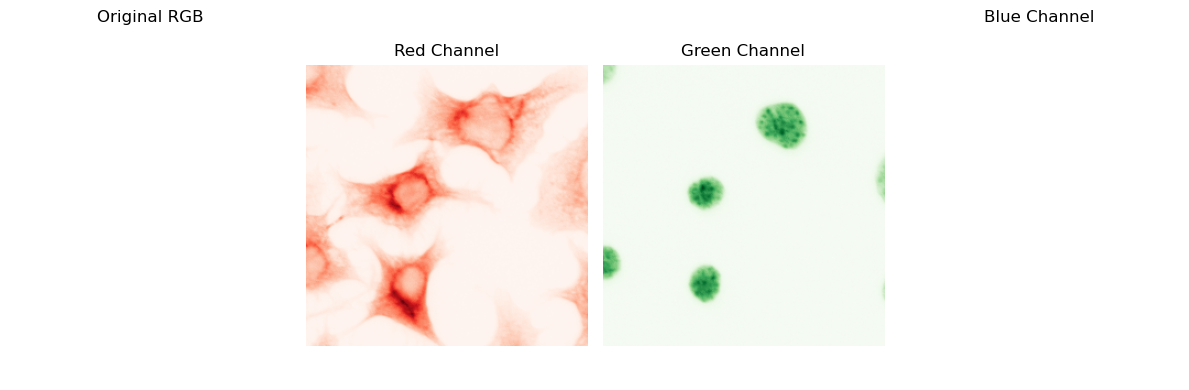

In [5]:
from skimage import io

# Load RGB image
rgb_image = imread('data/cells_8bit.tif')

print("RGB Image shape:", rgb_image.shape)

# Show all three channels
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# axs[0].imshow(rgb_image)
axs[0].set_title("Original RGB")
axs[1].imshow(rgb_image[:, :, 0], cmap='Reds')
axs[1].set_title("Red Channel")
axs[2].imshow(rgb_image[:, :, 1], cmap='Greens')
axs[2].set_title("Green Channel")
# axs[3].imshow(rgb_image[:, :, 2], cmap='Blues')
axs[3].set_title("Blue Channel")

for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

RGB Image shape: (2, 256, 256)


TypeError: Invalid shape (2, 256, 256) for image data

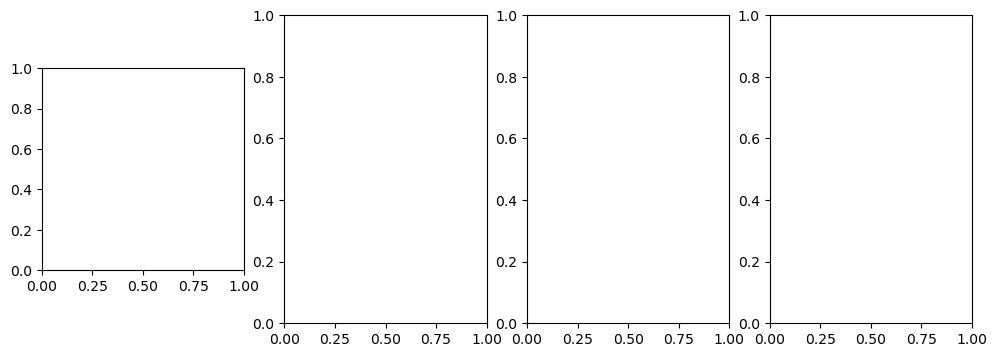

In [6]:
from skimage import io

# Load RGB image
rgb_image = imread('data/cells.tif')

print("RGB Image shape:", rgb_image.shape)

# Show all three channels
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

axs[0].imshow(rgb_image)
axs[0].set_title("Original RGB")
axs[1].imshow(rgb_image[0, :, :], cmap='Reds')
axs[1].set_title("Red Channel")
axs[2].imshow(rgb_image[1, :, :], cmap='Greens')
axs[2].set_title("Green Channel")
axs[3].imshow(rgb_image[2, :, :], cmap='Blues')
axs[3].set_title("Blue Channel")

for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

### Exercise: Convert RGB to grayscale
- Use `skimage.color.rgb2gray()` to convert the astronaut image to grayscale.
- Plot the grayscale image and its histogram.

---
## Image Shape, Data Type, Channels
- **shape:** tells us the size and dimensionality of the image. e.g., (512, 512) → grayscale; (512, 512, 3) → RGB
- **dtype:** data type of pixel values (e.g., uint8 for 0–255, float64 for 0–1).
- **Channels:**
    - Grayscale → 1 channel
    - RGB → 3 channels

*Why it matters: Shape and dtype affect how we process and visualize the image.*

In [3]:
print("Data type of grayscale image:", image.dtype)
print("Min, Max intensity:", image.min(), image.max())

# Normalize to float
image_float = image / 255.0
print("New dtype:", image_float.dtype)
print("New range:", image_float.min(), image_float.max())

Data type of grayscale image: uint8
Min, Max intensity: 1 252
New dtype: float64
New range: 0.00392156862745098 0.9882352941176471


---
## Plot Pixel Intensity Histogram
A histogram shows how often each pixel value occurs.

Useful to:
- Understand image contrast
- Detect under/overexposed images
- Plan preprocessing steps like thresholding or normalization

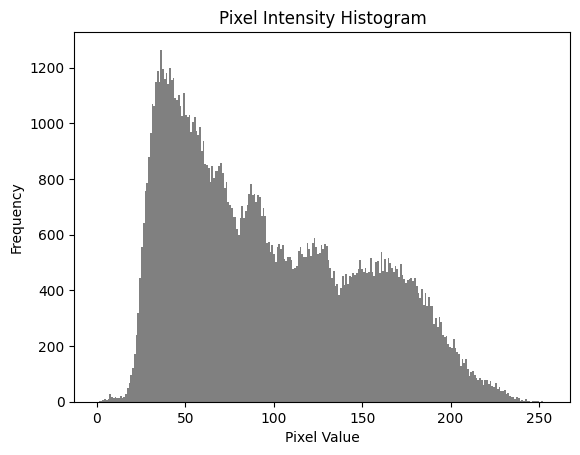

In [4]:
# Plot histogram of grayscale image
plt.hist(image.ravel(), bins=256, range=(0, 255), color='gray')
plt.title("Pixel Intensity Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

### Exercise: Image statistics
For any grayscale image:
- Compute mean, median, min, max pixel values.
- Plot histogram.

---
## Mini Project: Compare Microscopy Image Channels
**Goal:** Load a microscopy RGB image and analyze individual channels for intensity distribution.

**Tasks**
- Load an RGB image (can use data.cells3d() and extract a slice).
- Display all three channels separately.
- Plot the histogram for each channel.
- Compare which channel has the highest contrast or dynamic range.

In [5]:
from skimage.data import cells3d
from skimage.color import rgb2gray

cells = cells3d()
z_slice = cells[30, :, :, :]  # Get a slice

# Plot channels
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, color in enumerate(['Red', 'Green', 'Blue']):
    axes[i].imshow(z_slice[:, :, i], cmap=color.lower())
    axes[i].set_title(f'{color} Channel')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

ModuleNotFoundError: The requested file is part of the scikit-image distribution, but requires the installation of an optional dependency, pooch. To install pooch, use your preferred python package manager. Follow installation instruction found at https://scikit-image.org/docs/stable/user_guide/install.html

---
## Module Summary
| Concept            | Description                                                         |
| ------------------ | ------------------------------------------------------------------- |
| **Digital Image**  | Numeric grid of pixels stored in arrays                             |
| **Grayscale**      | Single channel; values from 0 (black) to 255 (white)                |
| **RGB**            | Three channels – Red, Green, Blue                                   |
| **Image Shape**    | Dimensions of the array (height, width, \[channels])                |
| **Data Type**      | Type of pixel value, e.g., uint8, float                             |
| **Histogram**      | Graph of pixel intensity distribution                               |
| **Hands-on Tools** | `matplotlib`, `skimage.data`, `plt.hist`, slicing and visualization |